In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'Desktop/http'))
	print(os.getcwd())
except:
	pass


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import zscore,norm,skew,skewnorm


In [74]:
# display options
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


from matplotlib import font_manager, rc
# mpl.rcParams['axes.unicode_minus'] = False
# font_name = font_manager.FontProperties(fname="/usr/share/fonts/malgun.ttf").get_name()
# rc('font', family=font_name)



In [75]:
# 2019.01.29일 상관없이 정규분포
df = pd.read_csv('M_0130.csv')  # S words(over 2 characters) tokened by konlpy 


In [76]:
df.describe()




,freq,zscore
count,11119.000000,1.111900e+04
mean,10.603741,5.112278e-17
std,40.732372,1.000045e+00
min,1.000000,-2.357872e-01
25%,1.000000,-2.357872e-01
50%,2.000000,-2.112356e-01
75%,6.000000,-1.130292e-01
max,1543.000000,3.762278e+01


In [77]:
df.describe()




,freq,zscore
count,11119.000000,1.111900e+04
mean,10.603741,5.112278e-17
std,40.732372,1.000045e+00
min,1.000000,-2.357872e-01
25%,1.000000,-2.357872e-01
50%,2.000000,-2.112356e-01
75%,6.000000,-1.130292e-01
max,1543.000000,3.762278e+01


In [78]:
############################# NO LOG
no_log = np.array(df.freq)
#skewness
print(skew(no_log))  # 왜도가 0 이면 정규분포


14.848297014201647


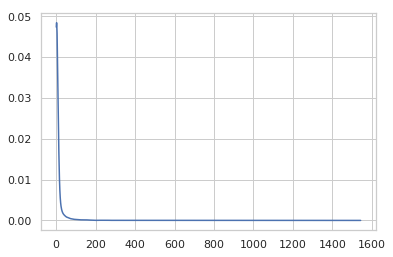

In [79]:
# 커널함수 - 밀도추정
from scipy import stats
X = no_log
estimator = stats.gaussian_kde(X, bw_method='silverman') 
K = estimator(X)
plt.plot(X, K, label='gaussian_kde') 
plt.show()
 


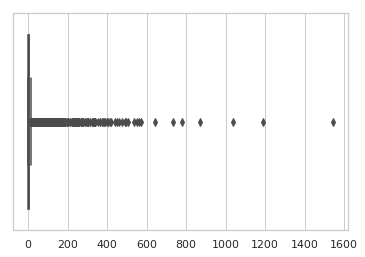

In [80]:
# boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(x=no_log)



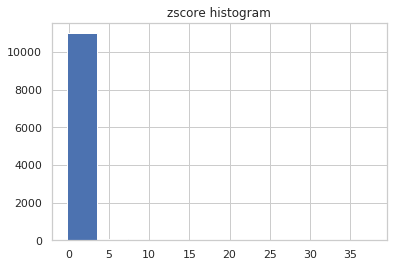

In [81]:
# 히스토그램
z_score = zscore(no_log)

plt.hist(z_score)
plt.title('zscore histogram')
plt.show()




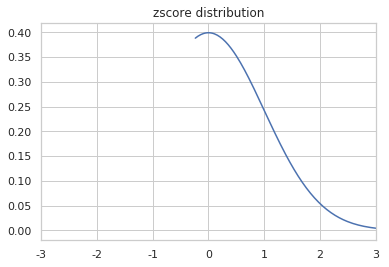

In [82]:
plt.plot(z_score, norm.pdf(z_score))
plt.xlim(-3,3)
plt.title('zscore distribution')
plt.show()




In [83]:
########################### AFTER LOG
after_log = np.array(np.log10(df.freq))

#skewness
print(skew(after_log))  # 로그를 취한 후 왜도가 줄어듦


1.2772735780837334


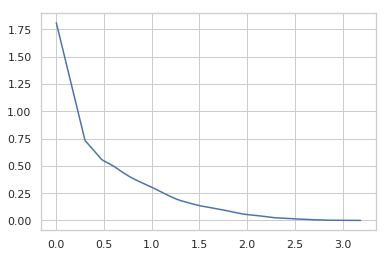

In [84]:
# 커널함수 - 밀도추정
X = after_log

estimator = stats.gaussian_kde(X, bw_method='silverman') 
K = estimator(X)
plt.plot(X, K, label='gaussian_kde') 
plt.show()
 

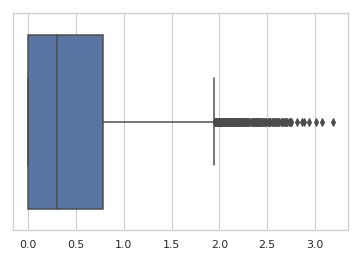

In [85]:
# boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(x=after_log)


In [86]:
for_zscore = list(after_log.flatten())
print(list(after_log.flatten())[:5])
print(type(for_zscore))


[3.188365926063148, 3.0759117614827773, 3.016197353512439, 2.9400181550076634, 2.8920946026904804]
<class 'list'>


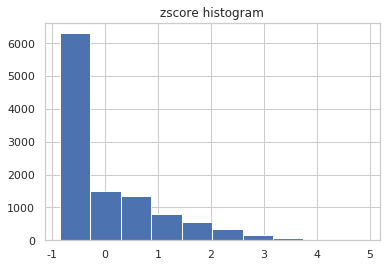

In [87]:
# 히스토그램
z_score = zscore(for_zscore)
 
plt.hist(z_score)
plt.title('zscore histogram')
plt.show()




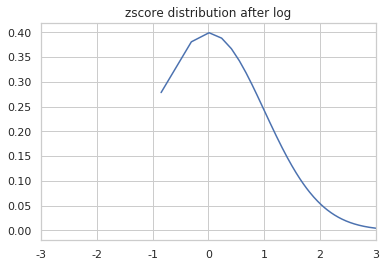

In [88]:
plt.plot(z_score, norm.pdf(z_score))
plt.xlim(-3,3)
plt.title('zscore distribution after log')
plt.show()






